In [154]:
import pandas as pd
import json
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
rows = []
for line in open("maxi.log"):
    try:
        m = re.match(r'INFO:root:([\d.]+) ({.*})', line)
        if m:
            t, data = m.groups()
            row = json.loads(data.replace("'", '"'))
            row["timestamp"] = float(t)
            rows.append(row)
    except Exception as e:
        continue

In [175]:
df = pd.DataFrame(rows)
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s", utc=True)
df = df.set_index("timestamp").tz_convert("Europe/Stockholm")
df = df.loc[df["stw"] >= 1]
df = df.reset_index()
df

,timestamp,stw,sog,tws,aws,twa,awa
0,2023-09-23 06:39:59.850965760+02:00,1.01,0,6.29,6.99,313.1,321.3
1,2023-09-23 06:39:59.911592960+02:00,1.01,0,6.29,5.85,313.1,177.1
2,2023-09-23 06:39:59.949139712+02:00,1.01,0,6.40,7.21,313.2,321.8
3,2023-09-23 06:40:00.046386176+02:00,1.01,0,6.40,7.32,313.2,322.2
4,2023-09-23 06:40:00.111616+02:00,1.01,0,6.47,5.85,313.4,177.1
...,...,...,...,...,...,...,...
38769,2023-09-23 07:45:25.809384448+02:00,2.74,0,7.36,9.60,319.1,329.7
38770,2023-09-23 07:45:25.898530816+02:00,2.69,0,7.36,9.60,319.2,329.7
38771,2023-09-23 07:45:25.908119040+02:00,2.69,0,7.36,9.60,319.2,329.7
38772,2023-09-23 07:45:26.008090112+02:00,2.69,0,7.37,9.61,319.2,329.7


In [176]:
df["tws_bin"] = pd.cut(df["tws"], [3, 5, 7, 9, 11, 13, 15, 17, 21])

In [177]:
df['rad'] = df.apply(lambda row: row["twa"]*math.pi/180, axis=1)
df["twa_bin"] = pd.cut(df["twa"], 180)
polar = df[["twa_bin", "tws_bin", "rad", "stw"]].groupby(["tws_bin", "twa_bin"]).mean().reset_index()
polar = polar.drop("twa_bin", axis=1)
polar

,tws_bin,rad,stw
0,"(3, 5]",0.013464,1.812857
1,"(3, 5]",0.057596,1.801818
2,"(3, 5]",0.086532,1.788947
3,"(3, 5]",0.123092,1.798421
4,"(3, 5]",0.157613,1.650278
...,...,...,...
1435,"(17, 21]",NaN,NaN
1436,"(17, 21]",NaN,NaN
1437,"(17, 21]",NaN,NaN
1438,"(17, 21]",NaN,NaN


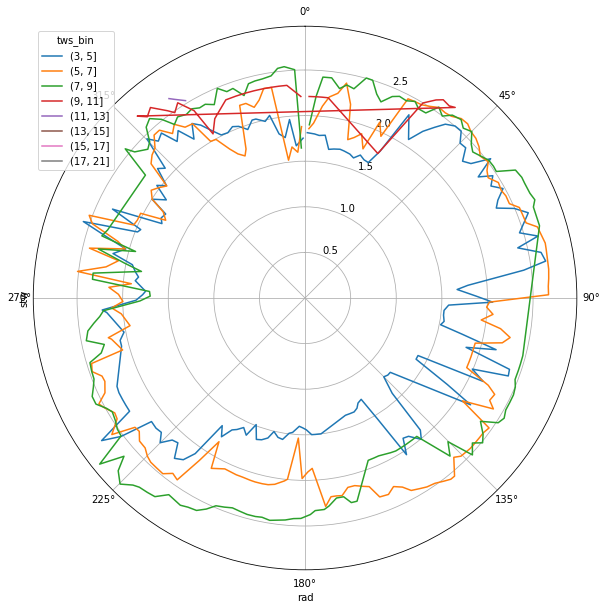

In [180]:
plt.figure(figsize=(10,10))
ax = plt.subplot(polar=True)
sns.lineplot(data=polar, x="rad", y="stw", hue="tws_bin")
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.savefig("maxi.pdf")

C:\Users\lnori\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

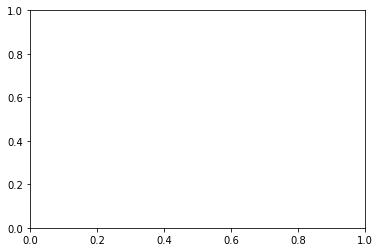

In [148]:
ax = plt.subplot(polar=False)
ax.plot(polar["rad"], polar["stw"])
# polar.plot(x="rad", y="stw", ax=ax)
# ax.set_theta_zero_location("N")
# ax.set_theta_direction(-1)